<a href="https://colab.research.google.com/github/madhav3099/GAN_Learning/blob/master/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [7]:
from keras import backend as K
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
np.random.seed(1000)

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [10]:
X_train = (x_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(60000,784)
print(X_train.shape)

(60000, 784)


In [11]:
from keras.optimizers import Adam
adam = Adam(lr = 0.0002 , beta_1 = 0.5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
from keras.models import Model , Sequential
from keras.layers import Input , Dense , Dropout , Flatten , LeakyReLU

In [13]:
input_dim = 10*10

generator = Sequential()

generator.add(Dense(256, input_dim = input_dim))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784 , activation = "tanh"))

generator.compile(loss = "binary_crossentropy" , optimizer = adam)

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [15]:
discriminator = Sequential()

discriminator.add(Dense(1024, input_dim = 784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1 , activation = "sigmoid"))

discriminator.compile(loss = "binary_crossentropy" , optimizer = adam)

discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

In [16]:
discriminator.trainable = False

ganInput = Input(shape = (input_dim ,))
x = generator(ganInput)
ganOutput = discriminator(x)

gan = Model(input = ganInput , output = ganOutput)

gan.compile(loss = "binary_crossentropy" , optimizer = adam)

gan.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  import sys


In [0]:
def generate_and_plot():
  num_examples =100
  noise = np.random.normal(0,1, size = [num_examples , input_dim])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(num_examples ,28 , 28)

  plt.figure(figsize = (10,10))
  for i in range(num_examples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_images[i] , cmap = "gray" , interpolation = "nearest")
    plt.axis("off")

  plt.show()


In [0]:
def train(epochs =1 , batch_size = 128):
  m = X_train.shape[0]
  batch_count = m // batch_size

  generate_and_plot()

  for e in range(epochs):
    print(f"Epoch: {e}")
    for _ in tqdm(range(batch_count)):
      noise = np.random.normal(0,1, size = [batch_size , input_dim])
      generated_images = generator.predict(noise)

      real_images = X_train[np.random.randint(0,m, size = batch_size)]

      X = np.concatenate([real_images , generated_images])
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9

      discriminator.trainable = True
      d_loss = discriminator.train_on_batch(X,y_dis)
      discriminator.trainable = False

      noise = np.random.normal(0,1, size = [batch_size , input_dim])
      y_gan = np.ones(batch_size)
      gan.train_on_batch(noise , y_gan)
    
    if e%10 == 0:
      generate_and_plot()

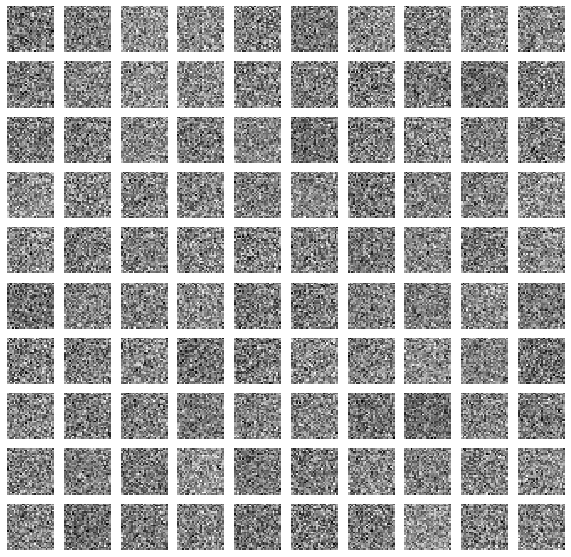

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch: 0


100%|██████████| 468/468 [00:14<00:00, 33.40it/s]


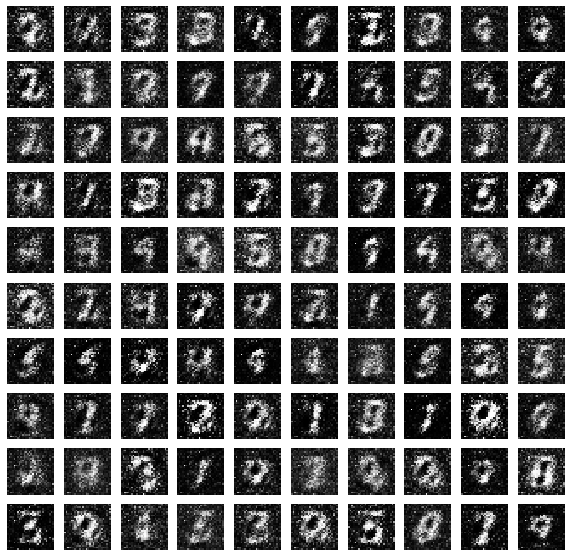

  1%|          | 4/468 [00:00<00:13, 34.62it/s]

Epoch: 1


  1%|          | 4/468 [00:00<00:11, 39.54it/s]

Epoch: 2


  1%|          | 5/468 [00:00<00:10, 42.74it/s]

Epoch: 3


  1%|          | 5/468 [00:00<00:10, 42.30it/s]

Epoch: 4


  1%|          | 5/468 [00:00<00:11, 41.24it/s]

Epoch: 5


  1%|          | 5/468 [00:00<00:11, 41.39it/s]

Epoch: 6


  1%|          | 4/468 [00:00<00:11, 39.87it/s]

Epoch: 7


  1%|          | 5/468 [00:00<00:11, 40.57it/s]

Epoch: 8


  1%|          | 5/468 [00:00<00:11, 40.54it/s]

Epoch: 9


  1%|          | 5/468 [00:00<00:11, 39.92it/s]

Epoch: 10


100%|██████████| 468/468 [00:12<00:00, 38.05it/s]


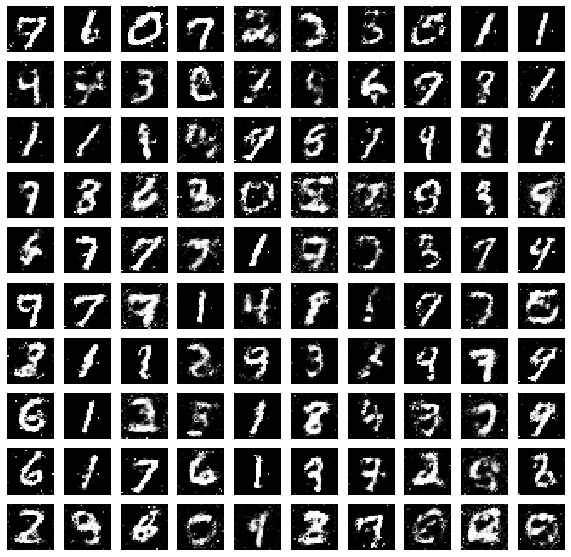

  1%|          | 4/468 [00:00<00:13, 34.23it/s]

Epoch: 11


  1%|          | 5/468 [00:00<00:10, 42.34it/s]

Epoch: 12


  1%|          | 4/468 [00:00<00:13, 35.10it/s]

Epoch: 13


  1%|          | 5/468 [00:00<00:11, 40.74it/s]

Epoch: 14


  1%|          | 5/468 [00:00<00:11, 40.82it/s]

Epoch: 15


  1%|          | 4/468 [00:00<00:11, 39.93it/s]

Epoch: 16


  1%|          | 4/468 [00:00<00:11, 39.16it/s]

Epoch: 17


  1%|          | 5/468 [00:00<00:11, 40.93it/s]

Epoch: 18


  1%|          | 4/468 [00:00<00:12, 38.53it/s]

Epoch: 19


  1%|          | 5/468 [00:00<00:11, 40.31it/s]

Epoch: 20


100%|██████████| 468/468 [00:11<00:00, 39.65it/s]


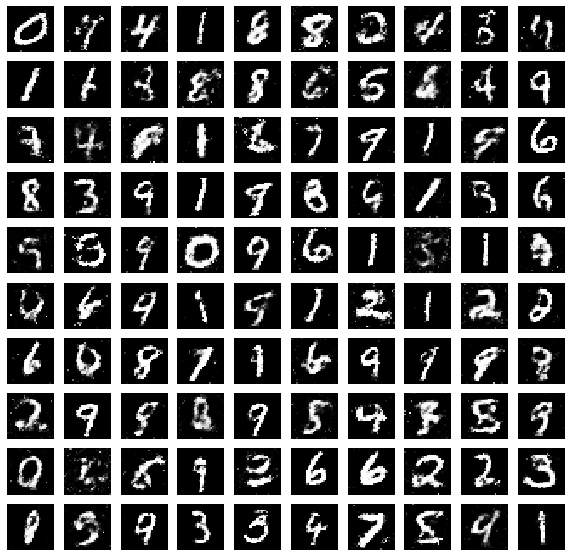

  1%|          | 4/468 [00:00<00:12, 36.60it/s]

Epoch: 21


  1%|          | 5/468 [00:00<00:11, 40.71it/s]

Epoch: 22


  1%|          | 4/468 [00:00<00:11, 39.90it/s]

Epoch: 23


  1%|          | 4/468 [00:00<00:12, 36.69it/s]

Epoch: 24


  1%|          | 4/468 [00:00<00:12, 36.21it/s]

Epoch: 25


  1%|          | 4/468 [00:00<00:12, 38.05it/s]

Epoch: 26


  1%|          | 4/468 [00:00<00:11, 39.33it/s]

Epoch: 27


  1%|          | 5/468 [00:00<00:11, 41.51it/s]

Epoch: 28


  1%|          | 4/468 [00:00<00:12, 36.35it/s]

Epoch: 29


  1%|          | 4/468 [00:00<00:11, 38.77it/s]

Epoch: 30


100%|██████████| 468/468 [00:12<00:00, 38.74it/s]


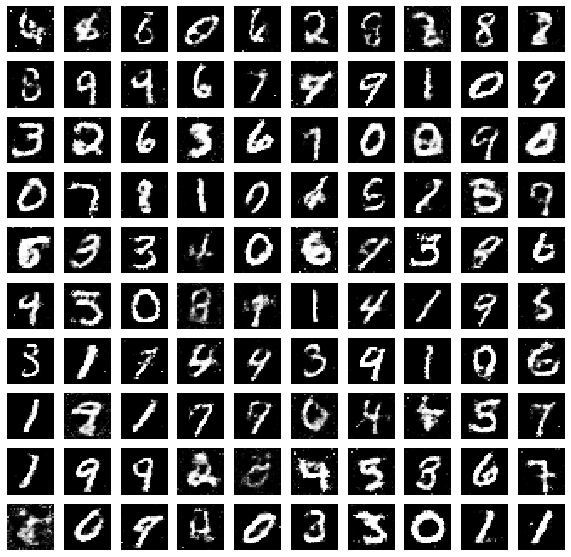

  1%|          | 4/468 [00:00<00:14, 31.50it/s]

Epoch: 31


  1%|          | 5/468 [00:00<00:11, 40.43it/s]

Epoch: 32


  1%|          | 4/468 [00:00<00:12, 38.31it/s]

Epoch: 33


  1%|          | 4/468 [00:00<00:11, 39.78it/s]

Epoch: 34


  1%|          | 4/468 [00:00<00:12, 38.01it/s]

Epoch: 35


  1%|          | 4/468 [00:00<00:12, 38.28it/s]

Epoch: 36


  1%|          | 5/468 [00:00<00:11, 40.58it/s]

Epoch: 37


  1%|          | 4/468 [00:00<00:12, 37.04it/s]

Epoch: 38


  1%|          | 5/468 [00:00<00:10, 42.70it/s]

Epoch: 39


  1%|          | 4/468 [00:00<00:11, 39.69it/s]

Epoch: 40


100%|██████████| 468/468 [00:11<00:00, 39.83it/s]


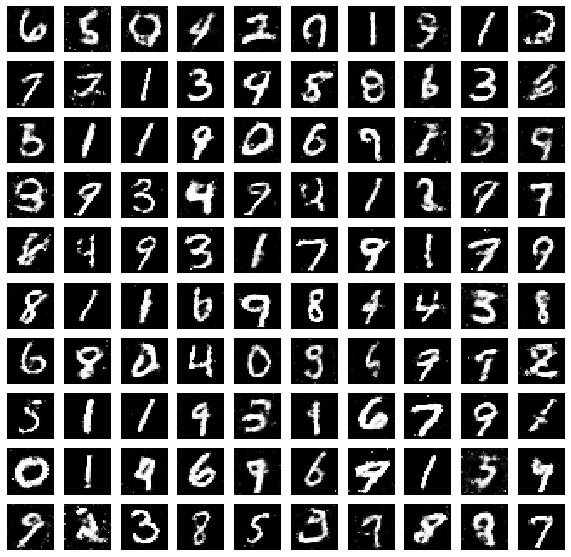

  1%|          | 4/468 [00:00<00:14, 32.78it/s]

Epoch: 41


  1%|          | 5/468 [00:00<00:11, 40.62it/s]

Epoch: 42


  1%|          | 5/468 [00:00<00:11, 41.67it/s]

Epoch: 43


  1%|          | 4/468 [00:00<00:12, 38.44it/s]

Epoch: 44


  1%|          | 5/468 [00:00<00:11, 42.04it/s]

Epoch: 45


  1%|          | 5/468 [00:00<00:11, 41.56it/s]

Epoch: 46


  1%|          | 4/468 [00:00<00:12, 38.65it/s]

Epoch: 47


  1%|          | 5/468 [00:00<00:10, 42.38it/s]

Epoch: 48


  1%|          | 5/468 [00:00<00:10, 42.59it/s]

Epoch: 49


100%|██████████| 468/468 [00:11<00:00, 40.37it/s]


In [22]:
train(50)

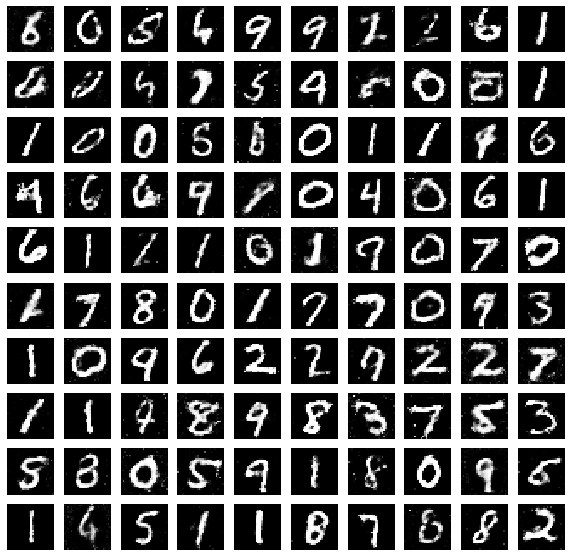

In [23]:
generate_and_plot()